#The Bern-Barcelona EEG Database Exploratory Data Analysis

We used a small sample dataset for analysis.

In [1]:
!unzip Data_F_50.zip -d data_f_50

Archive:  Data_F_50.zip
replace data_f_50/Data_F_Ind0001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data_f_50/Data_F_Ind0002.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip Data_N_50.zip -d data_n_50

In [1]:
import pandas as pd
import os

In [2]:
extract_path_f = "/content/data_f_50"
extract_path_n = "/content/data_n_50"

In [3]:
f_series = os.listdir(extract_path_f)
n_series = os.listdir(extract_path_n)

F-Series

In [4]:
# Load the first channel file
channel1_file = os.path.join(extract_path_f, 'Data_F_Ind0001.txt')
df = pd.read_csv(channel1_file,  sep=',', header=None)
print(df.head())

           0          1
0 -23.584467  22.621477
1 -20.180197  26.547081
2 -16.631811  28.431639
3 -12.762078  30.098673
4 -10.451992  30.030939


In [6]:
# Dictionary to store data for each channel
f_series_combined = {}

# Load each file and assign 'x' and 'y' as column names
for file in os.listdir(extract_path_f):

    channel_name = file.split('.')[0]
    channel_name_numeric = str(int(channel_name[-4:]))
    file_path = os.path.join(extract_path_f, file)

    # Load the file with 'x' and 'y' column names
    df = pd.read_csv(file_path, sep=",", names=['x', 'y'])

    # Store in the dictionary
    # channel_data[channel_name] = df
    f_series_combined[channel_name_numeric] = df

# Example of accessing data for 'channel1'
# print(channel_data['Data_F_Ind0020'].head())
print(f_series_combined["20"].head())

          x          y
0  2.879401  15.745559
1  3.611804  14.574082
2  4.103028  13.326495
3  3.387085  10.543905
4  2.072844   7.090987


In [7]:
len(f_series_combined['20']["x"])

10240

In [36]:
x_sum = 0
y_sum = 0
for num in range(1,len(f_series_combined)+1):
  x_sum += f_series_combined[str(num)]["x"]
  y_sum += f_series_combined[str(num)]["y"]


In [37]:
signal_diff = x_sum - y_sum

In [ ]:
signal_diff

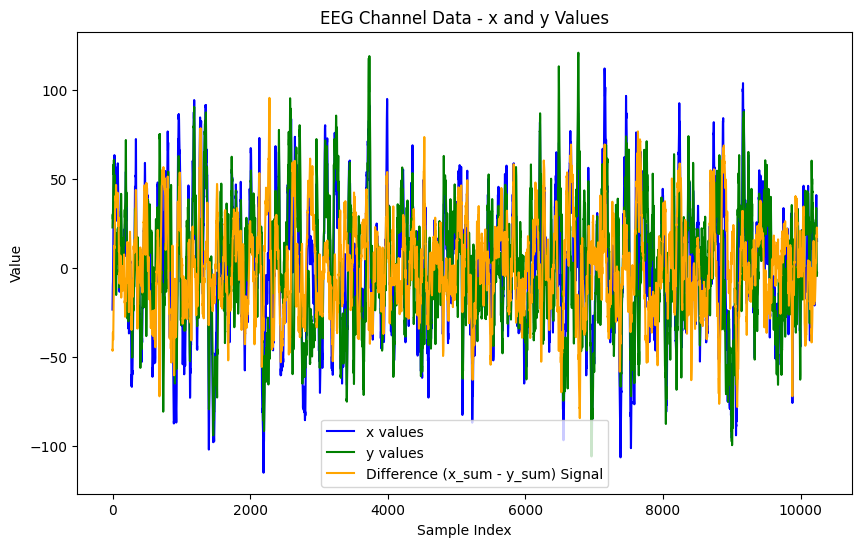

In [41]:
import matplotlib.pyplot as plt

# Example DataFrame for a channel
df = f_series_combined['1']

# Plot 'x' and 'y' values in different colors
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['x'], color='blue', label='x values')
plt.plot(df.index, df['y'], color='green', label='y values')
plt.plot(signal_diff, color='orange', label='Difference (x_sum - y_sum) Signal')

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('EEG Channel Data - x and y Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example DataFrame for a channel
df = f_series_combined['1']

# Plot 'x' and 'y' values in different colors
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['x'], color='blue', label='x values')
plt.plot(df.index, df['y'], color='green', label='y values')

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('EEG Channel Data - x and y Values')
plt.legend()

# Show the plot
plt.show()

In [9]:
stats = f_series_combined['1']['x'].describe()
print(stats)

count    10240.000000
mean         0.307275
std         36.244218
min       -115.290398
25%        -23.360001
50%         -0.499557
75%         24.553085
max        111.987671
Name: x, dtype: float64


In [10]:
stats = f_series_combined['1']['y'].describe()
print(stats)

count    10240.000000
mean         0.285338
std         33.357575
min       -106.143761
25%        -21.742449
50%          0.136138
75%         22.468815
max        120.839066
Name: y, dtype: float64


Correlation

In [11]:
df = f_series_combined['1']
combined_df = pd.DataFrame()

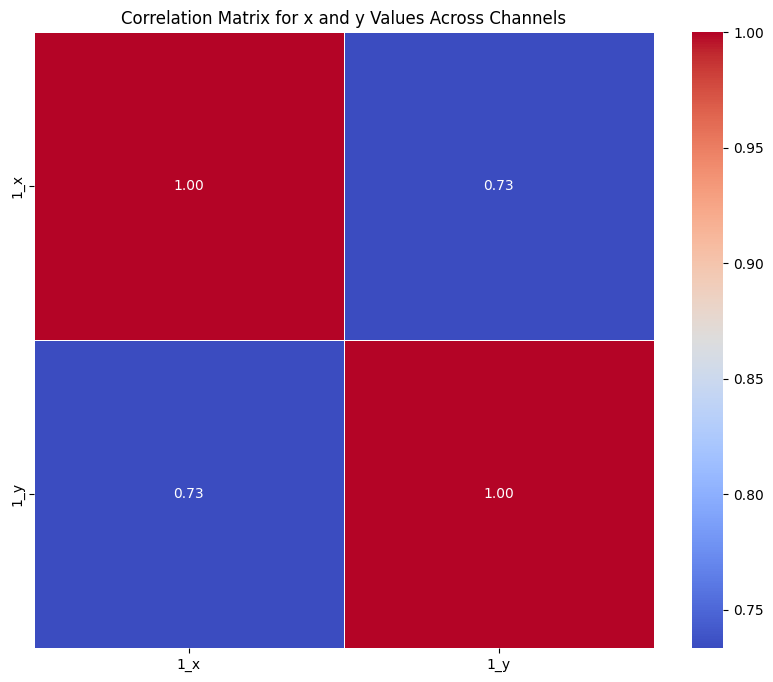

In [12]:
import seaborn as sns
combined_df[f'1_x'] = df['x']
combined_df[f'1_y'] = df['y']

# Drop rows with NaN values
combined_df.dropna(inplace=True)

# Calculate the correlation matrix
corr_matrix = combined_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix for x and y Values Across Channels')

# Show the plot
plt.show()

N-Series

In [13]:
# Load a specific channel file
channel_file_n = os.path.join(extract_path_n, 'Data_N_Ind0001.txt')
df_2 = pd.read_csv(channel_file_n, sep=",", header=None)

In [14]:
# Dictionary to store data for each channel
n_series_combined = {}

# Load each file and assign 'x' and 'y' as column names
for file in os.listdir(extract_path_n):

    channel_name = file.split('.')[0]
    channel_name_numeric = str(int(channel_name[-4:]))
    file_path = os.path.join(extract_path_n, file)

    # Load the file with 'x' and 'y' column names
    df_2 = pd.read_csv(file_path, sep=",", names=['x', 'y'])

    # Store in the dictionary
    # channel_data[channel_name] = df
    n_series_combined[channel_name_numeric] = df

# Example of accessing data for 'channel1'
# print(channel_data['Data_F_Ind0020'].head())
print(n_series_combined["20"].head())

           x          y
0 -23.584467  22.621477
1 -20.180197  26.547081
2 -16.631811  28.431639
3 -12.762078  30.098673
4 -10.451992  30.030939


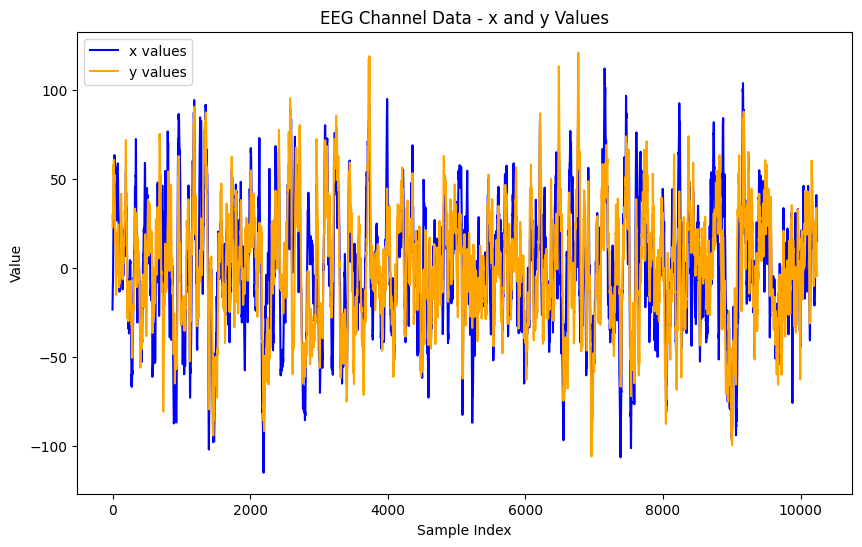

In [15]:
import matplotlib.pyplot as plt

# Example DataFrame for a channel
df = n_series_combined['1']

# Plot 'x' and 'y' values in different colors
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['x'], color='blue', label='x values')
plt.plot(df.index, df['y'], color='orange', label='y values')

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('EEG Channel Data - x and y Values')
plt.legend()

# Show the plot
plt.show()

In [16]:
stats = n_series_combined['1']['x'].describe()
print(stats)

count    10240.000000
mean         0.307275
std         36.244218
min       -115.290398
25%        -23.360001
50%         -0.499557
75%         24.553085
max        111.987671
Name: x, dtype: float64


In [17]:
stats = n_series_combined['1']['y'].describe()
print(stats)

count    10240.000000
mean         0.285338
std         33.357575
min       -106.143761
25%        -21.742449
50%          0.136138
75%         22.468815
max        120.839066
Name: y, dtype: float64
